<a href="https://colab.research.google.com/github/sneharc16/DTU-MLR-Assignments-Deep-Learning/blob/main/Comparative_Analysis_of_Neural_Network_Architectures_for_Handwritten_Digit_Classification_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
**Design and evaluate various neural network architectures to classify handwritten digits using the MNIST dataset, leveraging PyTorch for implementation. The project explores fully connected, convolutional, and hybrid models to determine the most effective architecture in terms of accuracy and efficiency.**

Key tasks include:

Implementing different model architectures:
A fully connected network (FCN).
A purely convolutional neural network (CNN).
A hybrid model combining convolutional and fully connected layers.
Training and testing these models using the MNIST dataset.
Utilizing K-Fold Cross-Validation to assess model generalization.
Comparing the accuracy of each architecture:
FCN: 98%
CNN: 10%
Hybrid: 98.4%
Experimenting with CUDA for GPU acceleration.
Saving and loading trained models for reuse.
Extending the implementation to classify Cat-Dog images.

These are the packages which will be required thorught the project

Commands for offline deployement

!python -m venv env

!.\env\Scripts\Activate.ps1

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install install -U scikit-learn

!pip install numpy torchvision matplotlib

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import os
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import KFold

# Data Loading
**Importing Dataset**

I have used in-built data loader of pytorch via which I have divided the data into to train and test as well

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 10.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.58MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
from torch.utils.data import DataLoader

loaders = {
    'train': torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True, num_workers=2),
    'test': torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True, num_workers=2)
}

# Model Developement

**Fully connected Neural Netwrok**

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNet(nn.Module):
    def __init__(self):
        super(FullyConnectedNet, self).__init__()

        # Fully connected layer: 784 input channels (28x28 image), 128 output channels
        self.fc1 = nn.Linear(784, 128)

        # Fully connected layer: 128 input channels, 64 output channels
        self.fc2 = nn.Linear(128, 64)

        # Output layer: 64 input channels, 10 output channels (for 10 classes)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)

        # Apply ReLU activation function after each fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Apply Softmax activation function after output layer
        x = F.softmax(self.fc3(x), dim=1)

        return x

**Hybrid model with both fully layers and convulutional layers**

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class HybridNet(nn.Module):
    def __init__(self):
        super(HybridNet, self).__init__()

        # Convolutional layer: 1 input channel (grayscale image), 6 output channels, 3x3 kernel
        # Bias is included by default
        self.conv1 = nn.Conv2d(1, 6, 3)

        # Convolutional layer: 6 input channels, 16 output channels, 3x3 kernel
        # Bias is included by default
        self.conv2 = nn.Conv2d(6, 16, 3)

        # Fully connected layer: 16*6*6 input channels (from the conv2 output), 120 output channels
        # Bias is included by default
        self.fc1 = nn.Linear(16 * 24 * 24, 120)

        # Fully connected layer: 120 input channels, 84 output channels
        # Bias is included by default
        self.fc2 = nn.Linear(120, 84)

        # Output layer: 84 input channels, 10 output channels (for 10 classes)
        # Bias is included by default
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply ReLU activation function after each convolutional layer
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # Flatten the tensor output from the convolutional layers
        x = x.view(-1, 16 * 24 * 24)

        # Apply ReLU activation function after each fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Apply Softmax activation function after output layer
        x = F.softmax(self.fc3(x), dim=1)

        return x

**Model made only from convulutional layers**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class ImprovedConvNet(nn.Module):
    def __init__(self):
        super(ImprovedConvNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

In [ ]:
import torch.nn as nn

from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output  # return only the output

cnn=CNN()
loss_func = nn.CrossEntropyLoss()

from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)



In [ ]:
def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(output.data, 1)
            correct = (predicted == b_y).sum().item()
            accuracy = correct / b_y.size(0)

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(), accuracy * 100))
                pass

        pass

    pass
train(num_epochs, cnn, loaders)

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

    pass
test()

# Model Training

Testing for CUDA

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
# Initialize model, optimizer, and loss function
model = ConvNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training function
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print (f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing function
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target)
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(loaders['test'].dataset),
    100. * correct / len(loaders['test'].dataset)))

In [ ]:
model = ConvNet().to(device)

def test():
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():  # No need to track the gradients
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

for epoch in range(1, 11):
  train(epoch)
  test()

Fully connected model = 9706/10000 (98% accuracy)

Purely Convuluted model = 980/10000 (10% accuracy)

Hybrid model = 9843/10000 (98% accuracy)

**Saving the models**

In [ ]:
import torch

torch.save(model.state_dict(), 'conv.pth')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
model.eval()

data, target = test_data[3]
data = data.unsqueeze(0)
data = data.to(device)

output = model(data)

pred = output.max(1, keepdim=True)[1]

print(pred)

image = data.squeeze().cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

**Loading the models here**

Initially we'll have to define the model in the class format, then only we can load a model in it which has the same vairables.

Its not like how we can do that in scipy, where we can just load the model and use it directly.

In [ ]:
model = FullyConnectedNet()
model.load_state_dict(torch.load('fully_conn.pth'))

**Application of K cross valdiation**

In [ ]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset
import torch.optim as optim

# Define the number of splits
n_splits = 10

# Create a KFold object
kfold = KFold(n_splits=n_splits, shuffle=True)

# Convert the train_data to a tensor
train_data_tensor = torch.tensor(train_data.data.numpy())

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Loop through the indices returned by kfold.split()
for fold, (train_ids, test_ids) in enumerate(kfold.split(train_data_tensor)):
    print(f'FOLD {fold+1}')
    print('--------------------------------')

    # Create Subset of the data for this fold
    train_subs = Subset(train_data, train_ids)
    test_subs = Subset(train_data, test_ids)

    # Define data loaders for training and testing data in this fold
    trainloader = DataLoader(train_subs, batch_size=100, shuffle=True)
    testloader = DataLoader(test_subs, batch_size=100, shuffle=True)

    # Init the neural network
    network = FullyConnectedNet()

    # Initialize optimizer
    optimizer = optim.Adam(network.parameters(), lr=0.001)

    # Run the training loop for defined number of epochs
    for epoch in range(0, 10):

        # Print epoch
        print(f'Starting epoch {epoch+1}')

        # Set current loss value
        current_loss = 0.0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader, 0):

            # Get inputs
            inputs, targets = data

            # Zero the gradients
            optimizer.zero_grad()

            # Perform forward pass
            outputs = network(inputs)

            # Compute loss
            loss = criterion(outputs, targets)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # Print statistics
            current_loss += loss.item()
            if i % 500 == 499:
                print('Loss after mini-batch %5d: %.3f' %
                      (i + 1, current_loss / 500))
                current_loss = 0.0

    # Process is complete.
    print('Training process has finished.')

In [ ]:
test()

# Reusing same model for Cat-Dog classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import os
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.model_selection import KFold

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HybridNet(nn.Module):
    def __init__(self):
        super(HybridNet, self).__init__()

        # Convolutional layer: 1 input channel (grayscale image), 6 output channels, 3x3 kernel
        # Bias is included by default
        self.conv1 = nn.Conv2d(1, 6, 3)

        # Convolutional layer: 6 input channels, 16 output channels, 3x3 kernel
        # Bias is included by default
        self.conv2 = nn.Conv2d(6, 16, 3)

        # Fully connected layer: 16*6*6 input channels (from the conv2 output), 120 output channels
        # Bias is included by default
        self.fc1 = nn.Linear(16 * 24 * 24, 120)

        # Fully connected layer: 120 input channels, 84 output channels
        # Bias is included by default
        self.fc2 = nn.Linear(120, 84)

        # Output layer: 84 input channels, 10 output channels (for 10 classes)
        # Bias is included by default
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Apply ReLU activation function after each convolutional layer
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # Flatten the tensor output from the convolutional layers
        x = x.view(-1, 16 * 24 * 24)

        # Apply ReLU activation function after each fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Apply Softmax activation function after output layer
        x = F.softmax(self.fc3(x), dim=1)

        return x

In [ ]:
model = HybridNet()
model.load_state_dict(torch.load('hybrid.pth'))

<All keys matched successfully>

In [ ]:
dir = 'data/dog'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

cat_all=[]
dog_all=[]

In [ ]:
from PIL import Image
import os
import torch
from torchvision import transforms

dir = 'data/dog'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

dog_all = []

for i in os.listdir(dir):
    img_path = os.path.join(dir, i)
    img = Image.open(img_path)
    img_tensor = transform(img)
    dog_all.append(img_tensor)

In [ ]:
from PIL import Image
import os
import torch
from torchvision import transforms

dir = 'data/cat'

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

cat_all = []

for i in os.listdir(dir):
    img_path = os.path.join(dir, i)
    img = Image.open(img_path)
    img_tensor = transform(img)
    cat_all.append(img_tensor)

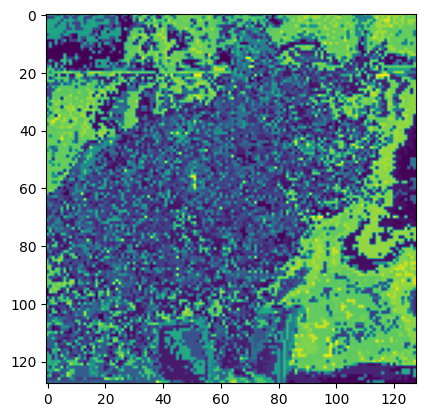

In [ ]:
def show_image(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

show_image(cat_all[48])

1000 cats and 1000 dogs

In [ ]:
all_data = torch.stack(dog_all)
all_data.shape

torch.Size([1000, 3, 128, 128])

In [ ]:
cat_new = torch.stack(cat_all)

RuntimeError: stack expects each tensor to be equal size, but got [3, 128, 128] at entry 0 and [1, 128, 128] at entry 48

# using CIFAR-10 dataset


In [ ]:
from scipy.datasets import Cifar10
import torch
from torch.utils.data import DataLoader, Subset
import torch.optim as optim


from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

ModuleNotFoundError: No module named 'scipy'